# 02. Hierarchical Clustering | التجميع الهرمي

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 4, Example 1: K-Means Clustering** - Understanding basic clustering
- ✅ **Understanding of distance metrics**: How to measure similarity
- ✅ **Basic tree concepts**: Understanding hierarchical structures

**If you haven't completed these**, you might struggle with:
- Understanding how hierarchical clustering builds clusters step-by-step
- Knowing when to use hierarchical vs K-Means clustering
- Understanding dendrograms and how to interpret them

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 4, Example 2** - it's an alternative clustering method to K-Means!

**Why this example SECOND in Unit 4?**
- **Before** you can use hierarchical clustering, you need to understand basic clustering
- **Before** you can choose clustering methods, you need to see different approaches
- **Before** you can use dendrograms, you need to understand hierarchical structures

**Builds on**: 
- 📓 Unit 4, Example 1: K-Means (we know basic clustering concepts)

**Leads to**: 
- 📓 Example 3: PCA (dimensionality reduction)
- 📓 All clustering projects (hierarchical clustering is widely used!)

**Why this order?**
1. Hierarchical clustering shows **different approach** (builds tree vs partitioning)
2. Hierarchical clustering provides **dendrograms** (visual representation of clusters)
3. Hierarchical clustering doesn't require **pre-specifying K** (can cut tree at any level)

---

## The Story: Building Clusters Step by Step | القصة: بناء المجموعات خطوة بخطوة

Imagine you're organizing a family tree. **Before** hierarchical clustering, you group people arbitrarily (like K-Means). **After** hierarchical clustering, you build relationships step-by-step: closest relatives first, then extended family - creates a tree structure!

Same with machine learning: **Before** hierarchical clustering, we partition data into K groups. **After** hierarchical clustering, we build clusters step-by-step, creating a tree (dendrogram) that shows all possible groupings!

---

## Why Hierarchical Clustering Matters | لماذا يهم التجميع الهرمي؟

Hierarchical clustering offers unique advantages:
- **No Pre-specified K**: Don't need to know number of clusters beforehand
- **Dendrogram**: Visual tree showing all possible clusterings
- **Flexible**: Can cut tree at any level to get desired number of clusters
- **Interpretable**: Tree structure shows relationships between clusters
- **Different Approach**: Builds clusters bottom-up (agglomerative) or top-down (divisive)

## Learning Objectives | أهداف التعلم
1. Build hierarchical clustering models
2. Understand different linkage methods (ward, complete, average, single)
3. Create and interpret dendrograms
4. Cut dendrograms to get clusters
5. Compare hierarchical clustering with K-Means
6. Know when to use hierarchical clustering

In [1]:
# Step 1: Import necessary libraries
# These libraries help us perform hierarchical clustering

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from scipy.cluster.hierarchy import (
    dendrogram,  # For visualizing hierarchical clustering tree
    linkage,     # For performing hierarchical clustering
    fcluster     # For cutting dendrogram to get clusters
)
from sklearn.cluster import AgglomerativeClustering  # sklearn's hierarchical clustering
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.metrics import silhouette_score  # For evaluating cluster quality

print("✅ Libraries imported successfully!")
print("\n📚 Key Hierarchical Clustering Concepts:")
print("   - Agglomerative: Bottom-up approach (start with individual points, merge into clusters)")
print("   - Dendrogram: Tree diagram showing cluster hierarchy")
print("   - Linkage: Method to measure distance between clusters")
print("   - Ward: Minimizes variance within clusters (most common)")
print("   - Complete: Maximum distance between clusters")
print("   - Average: Average distance between clusters")
print("   - Single: Minimum distance between clusters")
print("\n   ⚠️  IMPORTANT: Hierarchical clustering requires feature scaling!")

✅ Libraries imported successfully!

📚 Key Hierarchical Clustering Concepts:
   - Agglomerative: Bottom-up approach (start with individual points, merge into clusters)
   - Dendrogram: Tree diagram showing cluster hierarchy
   - Linkage: Method to measure distance between clusters
   - Ward: Minimizes variance within clusters (most common)
   - Complete: Maximum distance between clusters
   - Average: Average distance between clusters
   - Single: Minimum distance between clusters

   ⚠️  IMPORTANT: Hierarchical clustering requires feature scaling!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We used K-Means which requires specifying K (number of clusters) beforehand.

**AFTER**: We'll use hierarchical clustering which builds a tree structure - we can choose K later by cutting the tree!

**Why this matters**: Sometimes we don't know how many clusters exist. Hierarchical clustering shows all possible groupings in a dendrogram!

**Common Student Questions:**
- **Q: Why use hierarchical clustering instead of K-Means?**
  - Answer: Hierarchical doesn't need K (number of clusters) beforehand - shows all possible groupings
  - K-Means: Need to specify K, creates flat clusters
  - Hierarchical: Builds tree, can cut at any level to get any number of clusters
  - Use hierarchical when: Don't know K, want to see all groupings, need dendrogram
- **Q: What is a dendrogram?**
  - Answer: Tree diagram showing how clusters merge step-by-step
  - Bottom: Individual points, Top: All points in one cluster
  - Height shows distance when clusters merged (longer = more different)
  - Can cut at any height to get desired number of clusters
- **Q: Why does hierarchical clustering need scaling?**
  - Answer: Uses distances to merge clusters → scaling matters!
  - Problem: Features on different scales → distance dominated by larger-scale features
  - Solution: StandardScaler puts all features on same scale → fair distance calculation
- **Q: Which linkage method should I use?**
  - Answer: Ward (most common) - minimizes variance within clusters, good for most cases
  - Complete: Maximum distance - good for compact clusters
  - Average: Average distance - balanced approach
  - Single: Minimum distance - can create long chains (not recommended)
  - Rule of thumb: Start with Ward, try others if needed
- **Q: Is hierarchical clustering faster or slower than K-Means?**
  - Answer: Slower! Hierarchical is O(n³) complexity, K-Means is O(n)
  - Hierarchical: Good for small datasets (< 10k samples)
  - K-Means: Good for large datasets (millions of samples)
  - Use hierarchical for: Small datasets, need dendrogram, don't know K

In [2]:
# Generate sample data with clear clusters
# We'll create 3 distinct groups to demonstrate hierarchical clustering

print("\n1. Generating sample data...")
print("إنشاء بيانات نموذجية...")

np.random.seed(42)  # For reproducibility



1. Generating sample data...
إنشاء بيانات نموذجية...


## Step 1: Generate Sample Data | الخطوة 1: إنشاء بيانات نموذجية

**BEFORE**: We need to learn hierarchical clustering, but we need sample data to practice on.

**AFTER**: We'll create data with clear clusters to demonstrate hierarchical clustering!

**Why this data?** To see how hierarchical clustering builds clusters step-by-step and creates a dendrogram!


In [3]:
# Create distinct clusters
cluster1 = np.random.normal([2, 2], 0.5, (50, 2))
cluster2 = np.random.normal([6, 6], 0.5, (50, 2))
cluster3 = np.random.normal([2, 6], 0.5, (50, 2))
X = np.vstack([cluster1, cluster2, cluster3])


In [4]:
# Shuffle data (mix clusters together)
indices = np.random.permutation(len(X))
X = X[indices]

# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])

print(f"\n📊 Data Shape: {df.shape}")
print(df.head())
print("\n🔍 Notice:")
print("   - 150 data points in 2D space")
print("   - 3 distinct clusters (50 points each)")
print("   - Hierarchical clustering will build a tree showing how these clusters form!")



📊 Data Shape: (150, 2)
   feature_1  feature_2
0   1.963995   2.501766
1   1.769681   2.528561
2   5.292315   5.789677
3   5.504732   5.716851
4   6.006501   6.726767

🔍 Notice:
   - 150 data points in 2D space
   - 3 distinct clusters (50 points each)
   - Hierarchical clustering will build a tree showing how these clusters form!


In [5]:
# Scale features
scaler = StandardScaler()
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_scaled = scaler.fit_transform(X)


In [6]:
print("\n" + "=" * 60)
print("3. Cutting Dendrogram to Get Clusters")
print("قطع الرسم الشجري للحصول على مجموعات")
print("=" * 60)

n_clusters = 3  # We want 3 clusters



3. Cutting Dendrogram to Get Clusters
قطع الرسم الشجري للحصول على مجموعات



1. Different Linkage Methods
طرق الربط المختلفة

✓ Plot saved as 'hierarchical_dendrograms.png'


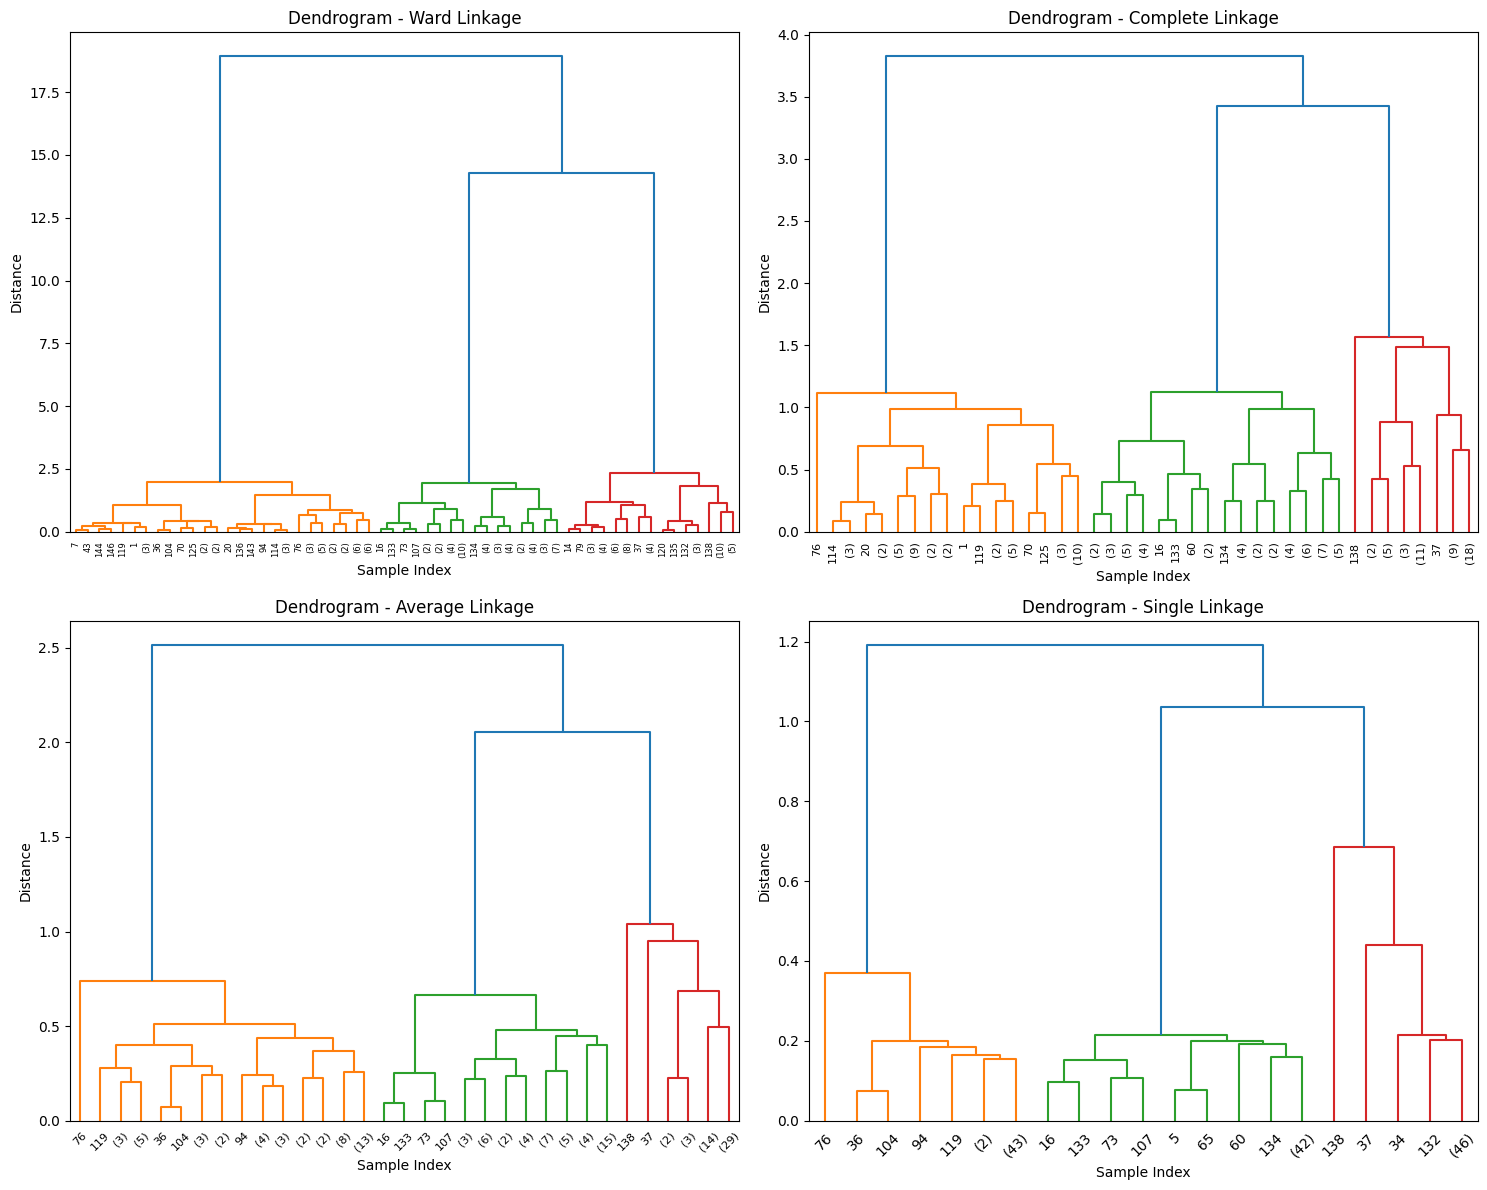


2. Detailed Dendrogram (Ward Linkage)
الرسم الشجري التفصيلي (ربط Ward)

✓ Plot saved as 'detailed_dendrogram.png'


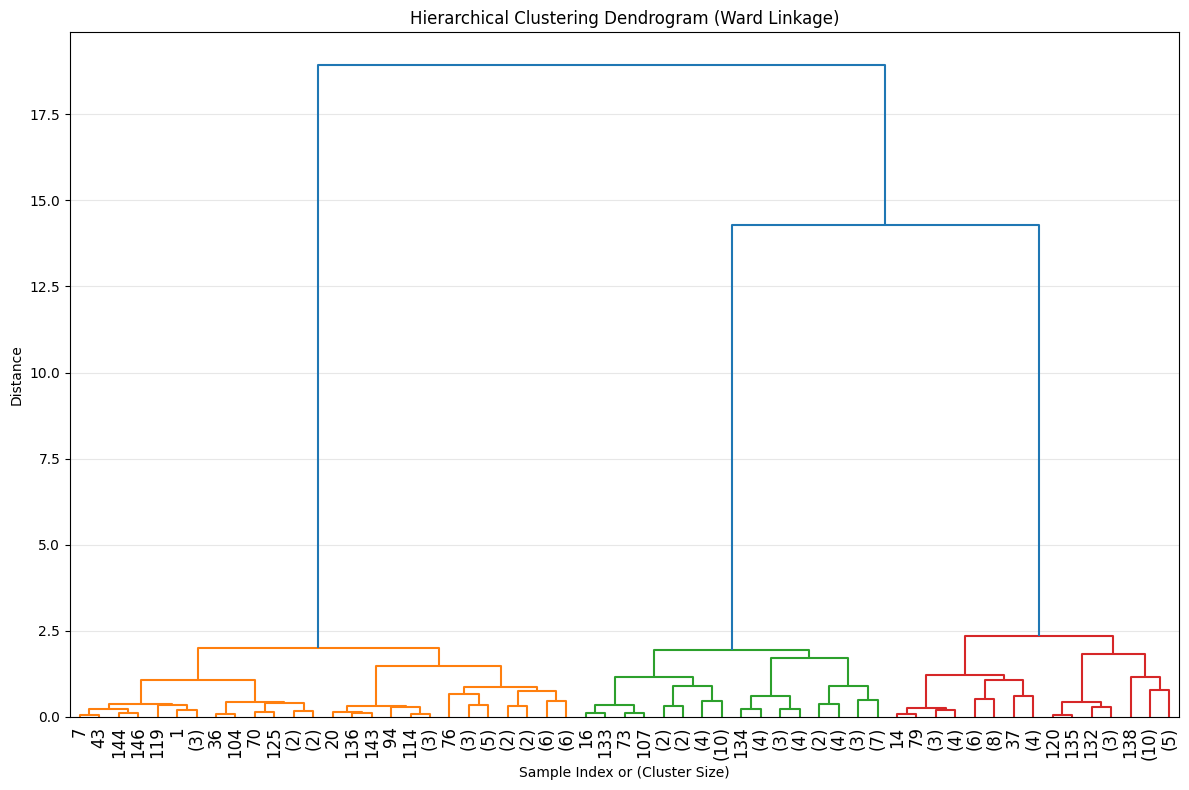

In [7]:
# 1. Different Linkage Methods
print("\n" + "=" * 60)
print("1. Different Linkage Methods")
print("طرق الربط المختلفة")
print("=" * 60)
linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()
for idx, method in enumerate(linkage_methods):
    # Perform hierarchical clustering
    Z = linkage(X_scaled, method=method)
    # Plot dendrogram
    dendrogram(Z, ax=axes[idx], truncate_mode='level', p=5)
    axes[idx].set_title(f'Dendrogram - {method.capitalize()} Linkage')
    axes[idx].set_xlabel('Sample Index')
    axes[idx].set_ylabel('Distance')
plt.tight_layout()
plt.savefig('hierarchical_dendrograms.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'hierarchical_dendrograms.png'")
plt.show()

# 2. Detailed Dendrogram with Ward Linkage
print("\n" + "=" * 60)
print("2. Detailed Dendrogram (Ward Linkage)")
print("الرسم الشجري التفصيلي (ربط Ward)")
print("=" * 60)
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=5,
          show_leaf_counts=True, leaf_rotation=90, leaf_font_size=12)
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('detailed_dendrogram.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'detailed_dendrogram.png'")
plt.show()


## 3. Cutting Dendrogram to Get Clusters


In [ ]:
# Add interpretation after silhouette score
print("\n" + "=" * 60)
print("💡 Interpreting Hierarchical Clustering Results | تفسير نتائج التجميع الهرمي")
print("=" * 60)

print(f"\n📊 Silhouette Score Quality Assessment:")
if silhouette >= 0.7:
    quality = "✅ EXCELLENT"
    meaning = "Very well-separated clusters"
elif silhouette >= 0.5:
    quality = "✅ GOOD"
    meaning = "Well-separated clusters"
elif silhouette >= 0.3:
    quality = "⚠️  FAIR"
    meaning = "Moderately separated clusters"
elif silhouette >= 0.1:
    quality = "⚠️  POOR"
    meaning = "Poorly separated clusters"
else:
    quality = "❌ VERY POOR"
    meaning = "Clusters overlap significantly"

print(f"   - Score: {silhouette:.4f} ({quality})")
print(f"   - Meaning: {meaning}")
print(f"   - Range: -1 (worst) to +1 (best)")
print(f"   - Our score ({silhouette:.4f}) indicates {'strong' if silhouette >= 0.5 else 'weak'} cluster separation")

print(f"\n📊 Hierarchical Clustering Advantages:")
print(f"   - No need to pre-specify K (can cut dendrogram at any level)")
print(f"   - Dendrogram shows all possible clusterings visually")
print(f"   - Can choose number of clusters after seeing the tree")
print(f"   - Different linkage methods give different results")

print(f"\n📚 What This Teaches Us:")
print(f"   - Hierarchical clustering builds clusters step-by-step")
print(f"   - Dendrogram visualizes the clustering process")
print(f"   - Silhouette score helps evaluate cluster quality")
print(f"   - Ward linkage often works well (minimizes variance)")
print(f"   - Hierarchical is slower than K-Means but more flexible")


In [9]:
# Method 1: Using distance threshold
distance_threshold = 3.0
labels_distance = fcluster(Z, distance_threshold, criterion='distance')


In [10]:
print("\n" + "=" * 60)
print("5. Using AgglomerativeClustering (sklearn)")
print("استخدام AgglomerativeClustering (sklearn)")
print("=" * 60)

# Use sklearn's AgglomerativeClustering
# n_clusters=3: We want 3 clusters
# linkage='ward': Ward linkage (minimizes variance, most common)
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg_cluster.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, labels_agg)

print(f"\n📊 AgglomerativeClustering Results:")
print(f"   Number of clusters: {len(np.unique(labels_agg))}")
print(f"   Silhouette Score: {silhouette:.4f} (higher is better)")

print(f"\n   ✅ Hierarchical clustering successfully found 3 clusters!")
print(f"   - sklearn's AgglomerativeClustering is easier to use")
print(f"   - Same results as scipy's linkage + fcluster")
print(f"   - High silhouette score indicates good clustering!")



5. Using AgglomerativeClustering (sklearn)
استخدام AgglomerativeClustering (sklearn)

📊 AgglomerativeClustering Results:
   Number of clusters: 3
   Silhouette Score: 0.7746 (higher is better)

   ✅ Hierarchical clustering successfully found 3 clusters!
   - sklearn's AgglomerativeClustering is easier to use
   - Same results as scipy's linkage + fcluster
   - High silhouette score indicates good clustering!


In [11]:
# Method 2: Using number of clusters
labels_n_clusters = fcluster(Z, n_clusters, criterion='maxclust')
print(f"\nClusters with distance threshold {distance_threshold}:")
print(f"عدد المجموعات: {len(np.unique(labels_distance))}")
print(f"\nClusters with n_clusters={n_clusters}:")
print(f"عدد المجموعات: {len(np.unique(labels_n_clusters))}")



Clusters with distance threshold 3.0:
عدد المجموعات: 3

Clusters with n_clusters=3:
عدد المجموعات: 3



4. Visualize Clusters
تصور المجموعات

✓ Plot saved as 'hierarchical_clusters.png'


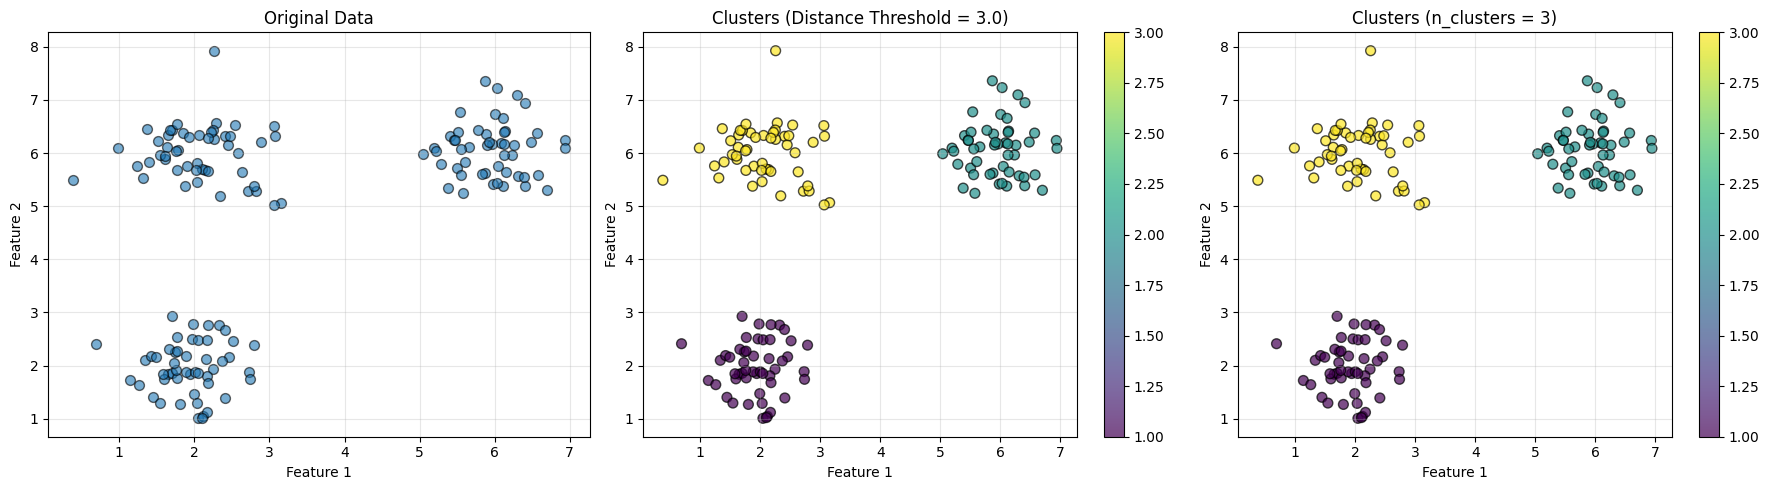

In [12]:
# 4. Visualize Clusters
print("\n" + "=" * 60)
print("4. Visualize Clusters")
print("تصور المجموعات")
print("=" * 60)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original data
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.6, s=50, edgecolors='black')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('Original Data')
axes[0].grid(True, alpha=0.3)

# Distance threshold clusters
scatter1 = axes[1].scatter(X[:, 0], X[:, 1], c=labels_distance,
                          cmap='viridis', alpha=0.7, s=50, edgecolors='black')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title(f'Clusters (Distance Threshold = {distance_threshold})')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[1])

# N clusters
scatter2 = axes[2].scatter(X[:, 0], X[:, 1], c=labels_n_clusters,
                          cmap='viridis', alpha=0.7, s=50, edgecolors='black')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].set_title(f'Clusters (n_clusters = {n_clusters})')
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[2])
plt.tight_layout()
plt.savefig('hierarchical_clusters.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'hierarchical_clusters.png'")
plt.show()


## 5. Using AgglomerativeClustering from sklearn


In [ ]:
# Add interpretation after best silhouette score
print("\n" + "=" * 60)
print("💡 Interpreting Optimal Linkage Method | تفسير طريقة الربط المثلى")
print("=" * 60)

best_silhouette = max(silhouette_scores)
best_idx = silhouette_scores.index(best_silhouette)
linkage_methods_list = ['ward', 'complete', 'average', 'single']
best_linkage = linkage_methods_list[best_idx] if best_idx < len(linkage_methods_list) else 'ward'

print(f"\n📊 Optimal Linkage Method:")
print(f"   - Best Method: {best_linkage}")
print(f"   - Best Silhouette Score: {best_silhouette:.4f}")

if best_silhouette >= 0.7:
    quality = "✅ EXCELLENT"
elif best_silhouette >= 0.5:
    quality = "✅ GOOD"
elif best_silhouette >= 0.3:
    quality = "⚠️  FAIR"
else:
    quality = "⚠️  POOR"

print(f"   - Quality: {quality}")

print(f"\n📊 Linkage Method Comparison:")
print(f"   - Ward: Minimizes variance within clusters (most common)")
print(f"   - Complete: Maximum distance between clusters")
print(f"   - Average: Average distance between clusters")
print(f"   - Single: Minimum distance between clusters (can create chains)")

print(f"\n📚 What This Teaches Us:")
print(f"   - Different linkage methods give different clusterings")
print(f"   - Ward linkage is often best for most datasets")
print(f"   - Silhouette score helps choose best linkage method")
print(f"   - Hierarchical clustering is flexible but slower than K-Means")
print(f"   - Use hierarchical when you don't know K beforehand")


## 6. Compare Different Numbers of Clusters


In [14]:
print("\n" + "=" * 60)
print("6. Compare Different Numbers of Clusters")
print("مقارنة أعداد مختلفة من المجموعات")
print("=" * 60)
n_clusters_range = range(2, 7)
silhouette_scores = []
for n in n_clusters_range:
    agg_temp = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels_temp = agg_temp.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels_temp)
    silhouette_scores.append(score)



6. Compare Different Numbers of Clusters
مقارنة أعداد مختلفة من المجموعات


In [15]:
# Find optimal number
optimal_n = n_clusters_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_n}")
print(f"Best Silhouette Score: {max(silhouette_scores):.4f}")



Optimal number of clusters: 3
Best Silhouette Score: 0.7746



✓ Plot saved as 'hierarchical_silhouette.png'


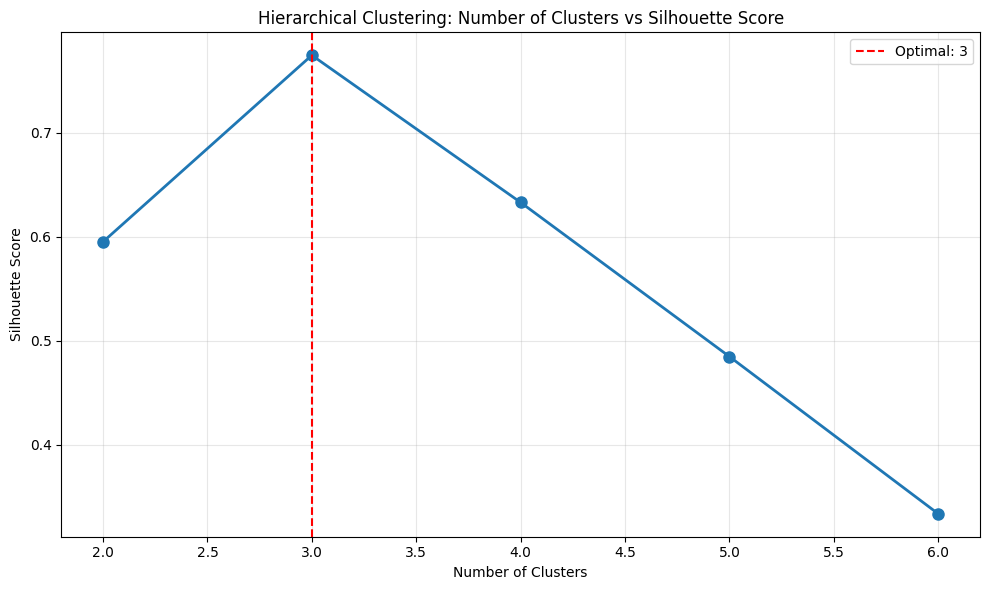

In [16]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.axvline(optimal_n, color='r', linestyle='--', label=f'Optimal: {optimal_n}')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Hierarchical Clustering: Number of Clusters vs Silhouette Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('hierarchical_silhouette.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'hierarchical_silhouette.png'")
plt.show()


## Step 7: Decision Framework - K-Means vs Hierarchical Clustering | الخطوة 7: إطار القرار - K-Means مقابل التجميع الهرمي

**BEFORE**: You've learned both K-Means and Hierarchical clustering, but when should you use each one?

**AFTER**: You'll have a clear decision framework to choose between K-Means and Hierarchical clustering!

**Why this matters**: Using the wrong clustering method can:
- **Poor clusters** → Wrong method may not capture your data structure
- **Wasted computation** → Using expensive methods when simple ones work
- **Wrong number of clusters** → Choosing wrong K or method

---

### 🎯 Decision Framework: K-Means vs Hierarchical | إطار القرار: K-Means مقابل الهرمي

**Key Question**: Should I use **K-MEANS** or **HIERARCHICAL CLUSTERING**?

#### Decision Tree:

```
What type of problem do you have?
├─ SUPERVISED LEARNING → Use classification/regression ❌
│   └─ Why? Clustering is for unsupervised learning
│
└─ UNSUPERVISED LEARNING → Check requirements:
    ├─ Know number of clusters (K)? → Check dataset size
    │   ├─ Large dataset (> 10,000) → Use K-MEANS ✅
    │   │   └─ Why? K-Means is faster for large data
    │   │
    │   └─ Small-medium dataset → Use K-MEANS or HIERARCHICAL ✅
    │       └─ Why? Both work, choose based on other factors
    │
    ├─ Don't know K? → Use HIERARCHICAL ✅
    │   └─ Why? Hierarchical shows all possible K in dendrogram
    │
    ├─ Need dendrogram visualization? → Use HIERARCHICAL ✅
    │   └─ Why? Only hierarchical provides dendrograms
    │
    ├─ Need fast clustering? → Use K-MEANS ✅
    │   └─ Why? K-Means is much faster
    │
    └─ Need flexible K selection? → Use HIERARCHICAL ✅
        └─ Why? Can cut dendrogram at any level
```

#### Detailed Decision Process:

```
Step 1: Do you know K (number of clusters)?
├─ YES → Continue to Step 2
└─ NO → Use HIERARCHICAL CLUSTERING ✅
    └─ Why? Hierarchical shows all possible K

Step 2: Dataset Size
├─ Large (> 10,000 samples) → Use K-MEANS ✅
│   └─ Why? K-Means is faster, hierarchical is slow
│
├─ Medium (1,000-10,000) → Continue to Step 3
└─ Small (< 1,000) → Continue to Step 3

Step 3: Need Visualization?
├─ Need dendrogram? → Use HIERARCHICAL ✅
│   └─ Why? Only hierarchical provides dendrograms
│
└─ Don't need dendrogram? → Continue to Step 4

Step 4: Speed vs Flexibility
├─ Need fast results? → Use K-MEANS ✅
│   └─ Why? K-Means is much faster
│
└─ Need flexible K selection? → Use HIERARCHICAL ✅
    └─ Why? Can try different K without re-running
```

---

### 📊 Comparison Table: K-Means vs Hierarchical | جدول المقارنة

| Aspect | K-Means | Hierarchical | Winner |
|--------|---------|-------------|--------|
| **Speed** | Fast (O(n)) | Slow (O(n² log n)) | K-Means |
| **Scalability** | Scales well | Doesn't scale well | K-Means |
| **Need to Specify K** | Yes (required) | No (optional) | Hierarchical |
| **Dendrogram** | No | Yes | Hierarchical |
| **Cluster Shape** | Spherical only | Any shape | Hierarchical |
| **Initialization** | Sensitive | Not sensitive | Hierarchical |
| **Flexible K** | Need to re-run | Cut dendrogram | Hierarchical |
| **Interpretability** | Centroids | Tree structure | Both (different) |
| **Best For** | Large data, known K | Small data, unknown K | Depends |

---

### ✅ When to Use K-Means | متى تستخدم K-Means

**Use K-Means when:**

1. **Large Dataset** ✅
   - More than 10,000 samples
   - K-Means is much faster
   - **Example**: 100,000+ customer records

2. **Know Number of Clusters** ✅
   - Know or can estimate K
   - K-Means requires specifying K
   - **Example**: Want exactly 5 customer segments

3. **Fast Clustering Needed** ✅
   - Need quick results
   - K-Means is computationally efficient
   - **Example**: Real-time segmentation

4. **Spherical Clusters** ✅
   - Clusters are round, ball-shaped
   - K-Means assumes spherical clusters
   - **Example**: Similar customers form round groups

5. **Production Systems** ✅
   - Need fast, scalable clustering
   - K-Means is production-ready
   - **Example**: Live customer segmentation system

---

### ✅ When to Use Hierarchical Clustering | متى تستخدم التجميع الهرمي

**Use Hierarchical Clustering when:**

1. **Unknown Number of Clusters** ✅
   - Don't know K
   - Hierarchical shows all possible K
   - **Example**: Exploring data, don't know how many groups

2. **Need Dendrogram** ✅
   - Want to visualize cluster hierarchy
   - Need to see relationships
   - **Example**: Gene clustering, need to see gene relationships

3. **Small to Medium Dataset** ✅
   - Less than 10,000 samples
   - Hierarchical works well
   - **Example**: 500-5,000 samples

4. **Flexible K Selection** ✅
   - Want to try different K easily
   - Can cut dendrogram at any level
   - **Example**: Exploring different numbers of segments

5. **Non-Spherical Clusters** ✅
   - Clusters are irregular shapes
   - Hierarchical handles any shape
   - **Example**: Elongated or irregular clusters

6. **Interpretable Tree Structure** ✅
   - Need to understand cluster relationships
   - Dendrogram shows hierarchy
   - **Example**: Taxonomy, family trees, organizational structure

---

### ❌ When NOT to Use Each Method | متى لا تستخدم كل طريقة

#### Don't use K-Means when:
1. **Unknown K** ❌
   - Can't estimate number of clusters
   - **Use Instead**: Hierarchical Clustering

2. **Very Large Dataset** ❌
   - More than 100,000 samples (hierarchical too slow)
   - **Use Instead**: K-Means (only option for very large data)

3. **Non-Spherical Clusters** ❌
   - Clusters are elongated or irregular
   - **Use Instead**: Hierarchical or DBSCAN

4. **Need Dendrogram** ❌
   - Want to visualize hierarchy
   - **Use Instead**: Hierarchical Clustering

#### Don't use Hierarchical Clustering when:
1. **Very Large Dataset** ❌
   - More than 10,000 samples
   - Hierarchical is too slow
   - **Use Instead**: K-Means

2. **Know K and Need Speed** ❌
   - Know number of clusters, need fast results
   - **Use Instead**: K-Means

3. **Production System** ❌
   - Need real-time clustering
   - Hierarchical is too slow
   - **Use Instead**: K-Means

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Customer Segmentation (50,000 customers, want 5 segments) ✅ K-MEANS
- **Problem**: Segment customers into 5 groups
- **Known K**: Yes (5 segments)
- **Dataset**: Large (50,000 customers)
- **Decision**: ✅ Use K-Means
- **Reasoning**: Known K, large dataset, need speed

#### Example 2: Gene Clustering (1,000 genes, unknown groups) ✅ HIERARCHICAL
- **Problem**: Cluster genes by expression
- **Known K**: No (don't know how many groups)
- **Dataset**: Small-medium (1,000 genes)
- **Need Dendrogram**: Yes (want to see gene relationships)
- **Decision**: ✅ Use Hierarchical Clustering
- **Reasoning**: Unknown K, need dendrogram, small dataset

#### Example 3: Document Clustering (20,000 documents, want 10 topics) ✅ K-MEANS
- **Problem**: Cluster documents into topics
- **Known K**: Yes (10 topics)
- **Dataset**: Large (20,000 documents)
- **Decision**: ✅ Use K-Means
- **Reasoning**: Known K, large dataset, need speed

#### Example 4: Species Classification (500 species, explore groups) ✅ HIERARCHICAL
- **Problem**: Classify species into groups
- **Known K**: No (exploring natural groupings)
- **Dataset**: Small (500 species)
- **Need Dendrogram**: Yes (want to see evolutionary relationships)
- **Decision**: ✅ Use Hierarchical Clustering
- **Reasoning**: Unknown K, need dendrogram, exploring relationships

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Large data → K-Means** - Use K-Means for datasets > 10,000
2. **Unknown K → Hierarchical** - Use hierarchical when you don't know K
3. **Need dendrogram → Hierarchical** - Only hierarchical provides dendrograms
4. **Known K → K-Means** - Use K-Means when you know number of clusters
5. **Speed → K-Means** - K-Means is much faster
6. **Flexibility → Hierarchical** - Hierarchical allows trying different K easily
7. **Try both** - Sometimes try both methods, compare results

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Segmenting 30,000 customers into 4 groups
- **Known K**: Yes (4 groups)
- **Dataset**: Large (30,000)
- **Decision**: ✅ K-Means (known K, large dataset, need speed)

**Scenario 2**: Clustering 800 genes (exploring how many groups)
- **Known K**: No (exploring)
- **Dataset**: Small (800)
- **Need Dendrogram**: Yes
- **Decision**: ✅ Hierarchical (unknown K, need dendrogram, small dataset)

**Scenario 3**: Compressing images to 256 colors (millions of pixels)
- **Known K**: Yes (256 colors)
- **Dataset**: Very large (millions)
- **Decision**: ✅ K-Means (known K, very large dataset, need speed)

---

**Connection to Next Steps**: 
- 📓 **Example 1: K-Means** - For comparison and when to use K-Means
- 📓 **Example 3: PCA** - For dimensionality reduction before clustering
- 📓 **All Clustering Projects** - Choose method based on your needs


In [17]:
# 7. Compare Linkage Methods
print("\n" + "=" * 60)
print("7. Compare Linkage Methods")
print("مقارنة طرق الربط")
print("=" * 60)
linkage_methods = ['ward', 'complete', 'average']
n_clusters = 3
results = []
for method in linkage_methods:
    agg_temp = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    labels_temp = agg_temp.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels_temp)
    results.append({
        'Linkage': method,
        'Silhouette Score': score
    })
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

results_df = pd.DataFrame(results)
print("\nLinkage Methods Comparison:")
print(results_df.to_string(index=False))
print("\n" + "=" * 60)
print("Example 2 Complete! ✓")
print("اكتمل المثال 2! ✓")
print("=" * 60)



7. Compare Linkage Methods
مقارنة طرق الربط

Linkage Methods Comparison:
 Linkage  Silhouette Score
    ward          0.774644
complete          0.774644
 average          0.774644

Example 2 Complete! ✓
اكتمل المثال 2! ✓
